# Acne Classifictaion Model TCC GRUPO 14

##  Realizando pré processamento dos dados deixando as imagens do mesmo tamanho

Importação de datasets de imagens

In [47]:
import pathlib
import cv2


def resize_image(image_path, output_size):
    img = cv2.imread(str(image_path))
    if img is not None:
        img_resized = cv2.resize(img, output_size, interpolation=cv2.INTER_AREA)
        cv2.imwrite(str(image_path), img_resized)
    else:
        print(f"Erro ao ler a imagem: {image_path}")

# Percorrer todos os arquivos na pasta e subpastas
for image_path in data_dir.glob('**/*.*'):
    resize_image(image_path, size)
    print(f'Resized: {image_path}')

print("Todas as imagens foram redimensionadas para 512x512.")

Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (979).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (98).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (98).png
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (980).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (981).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (982).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (983).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (984).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (985).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (986).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (987).jpg
Resized: C:\Users\italo\Downloads\IGA Severidades - Copia\Severidade 0\1 (99).jpg
Resized

In [48]:
import pathlib

In [49]:
url = r'C:\Users\italo\Downloads\IGA Severidades - Copia'

In [50]:
data_dir=pathlib.Path(url)

In [51]:
len(list(data_dir.glob('*/*.JPG')))

89

In [52]:
# Lista todas as subpastas (e arquivos, se houver) no diretório especificado
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['Severidade 0',
 'Severidade 1',
 'Severidade 2',
 'Severidade 3',
 'Severidade 4']

In [53]:
from PIL import Image

In [54]:
severity_4 = list(data_dir.glob('Severidade 4/*'))

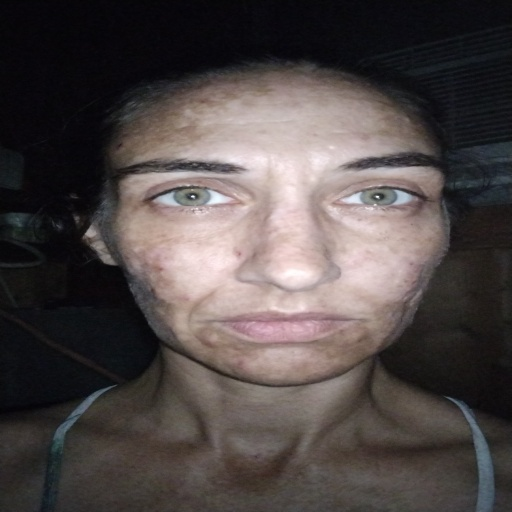

In [55]:
PIL.Image.open(str(severity_4[0]))

Compreendendo as dimensões e canais de cores

In [56]:
import numpy as np

In [57]:
# Verificando o número de imagens por classe e obtendo informações de uma imagem exemplo
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.JPG'))
    print(f"Classe '{subfolder}' tem {len(images)} imagens.")

    # Verificando as dimensões e canais de uma imagem exemplo
    if images:
        img = PIL.Image.open(str(images[0]))
        img_array = np.array(img)
        print(f"Dimensões da primeira imagem em '{subfolder}': {img_array.shape}")

Classe 'Severidade 0' tem 21 imagens.
Dimensões da primeira imagem em 'Severidade 0': (512, 512, 3)
Classe 'Severidade 1' tem 21 imagens.
Dimensões da primeira imagem em 'Severidade 1': (512, 512, 3)
Classe 'Severidade 2' tem 18 imagens.
Dimensões da primeira imagem em 'Severidade 2': (512, 512, 3)
Classe 'Severidade 3' tem 21 imagens.
Dimensões da primeira imagem em 'Severidade 3': (512, 512, 3)
Classe 'Severidade 4' tem 8 imagens.
Dimensões da primeira imagem em 'Severidade 4': (512, 512, 3)


- RGB (255,0,0) representa o vermelho puro.
- RGB (0,255,0) representa o verde puro.
- RGB (0,0,255) representa o verde puro.

- RGB (0, 0, 0) é preto porque não há luz sendo emitida.
- RGB (255, 255, 255) é branco porque todos os canais estão emitindo luz no máximo, combinando luz vermelha, verde e azul para criar luz branca.

Carregando os dados com o Tensorflow

In [59]:
batch_size = 64
altura = 512
largura = 512

In [60]:
import tensorflow as tf

In [61]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 91 files belonging to 5 classes.
Using 73 files for training.


In [62]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 91 files belonging to 5 classes.


Using 18 files for validation.


In [63]:
treino.class_names

['Severidade 0',
 'Severidade 1',
 'Severidade 2',
 'Severidade 3',
 'Severidade 4']

Montando múltiplas camadas da Rede Neural

In [64]:
tf.random.set_seed(42)

In [65]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(512, 512, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

- [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): Define uma sequência de camadas na rede neural;
- [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling): Camada de processamento que reescala os valores de entrada para um novo intervalo;
- [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): O método Flatten pega a matriz tridimensional das imagens que tinha o tamanho de 512x512x3 originalmente e passa para o formato de um array unidimensinal com 196608 valores neste caso; Isso porque o resultado da multiplicação 512x512x3 é igual 196608;
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): Adiciona uma camada de neurônios;
- [ReLU](https://www.tensorflow.org/api_docs/python/tf/nn/relu): Função de ativação que realiza o seguinte processo na saída de cada neurônio:

Se x > 0: retorna x;
Do contrário: retorna 0;

Em outras palavras, apenas passa valores maiores que zero para próxima camada.

- [Softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax): Função de ativação que pega uma lista de valores e os dimensiona para que a soma de todos os elementos seja igual a 1. Quando aplicado aos resultados do modelo, você pode pensar nos valores dimensionados como a probabilidade para aquela classe. Por exemplo, em seu modelo de classificação que possui 4 unidades na camada densa de saída, ter o valor mais alto no índice = 3 significa que o modelo está mais confiante de que a imagem de entrada seja da classe LeafBlight.

In [66]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Realizando o Treinamento do Modelo V1

In [68]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2099 - loss: 90.4820 - val_accuracy: 0.2222 - val_loss: 1286.0315
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1904 - loss: 1321.1357 - val_accuracy: 0.2778 - val_loss: 327.3573
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2477 - loss: 354.6763 - val_accuracy: 0.3333 - val_loss: 300.9775
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3872 - loss: 317.0033 - val_accuracy: 0.2222 - val_loss: 329.1167
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3286 - loss: 344.2333 - val_accuracy: 0.1667 - val_loss: 519.5575
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2477 - loss: 487.4496 - val_accuracy: 0.0556 - val_loss: 365.8750
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2190 - loss: 339.8993 - val_accuracy: 0.1667 - val_loss: 366.9330
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3390 - loss: 388.5426 - val_accuracy: 0.3333 - va

In [69]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 786432)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   100,663,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,992,209 (1.13 GB)

 Trainable params: 100,664,069 (384.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,328,140 (768.01 MB)

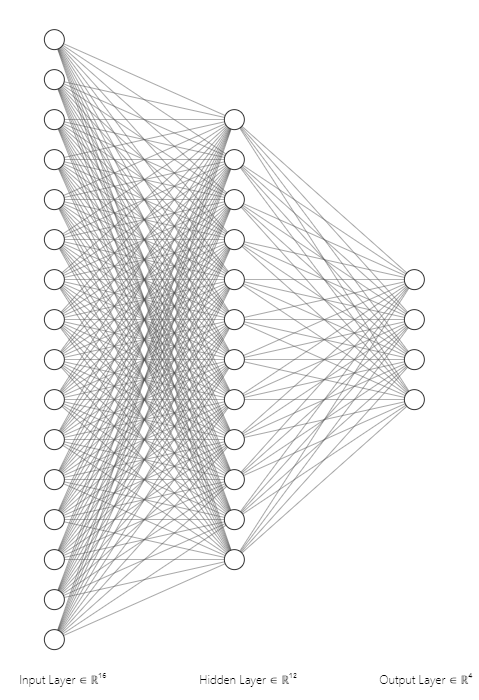

## Verificando os resultados desse modelo de forma gráfica

In [70]:
import matplotlib.pyplot as plt

In [71]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()


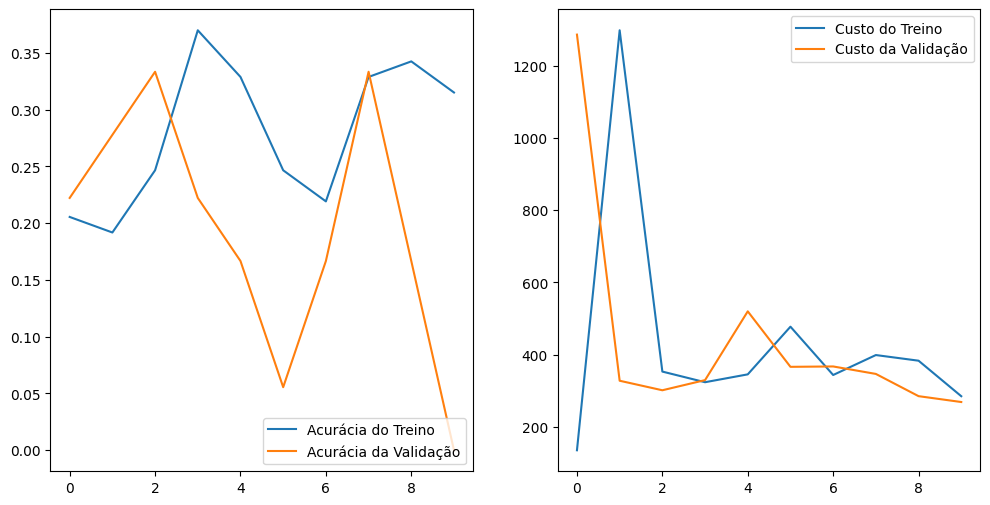

In [72]:
plota_resultados(history,epocas)

## Adicionando camadas convolucionais para melhorar acuraria do modelo

In [76]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(512, 512, 3)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [77]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Realizando o Treinamento do Modelo V2 com camadas Convulacionais (ReLu e Softmax)

In [78]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.2568 - loss: 3.0405 - val_accuracy: 0.3333 - val_loss: 30.4628
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.2660 - loss: 31.1170 - val_accuracy: 0.2222 - val_loss: 12.6240
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.1956 - loss: 10.3359 - val_accuracy: 0.0000e+00 - val_loss: 5.3816
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.2855 - loss: 2.8119 - val_accuracy: 0.2222 - val_loss: 1.6810
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.6675 - loss: 0.9589 - val_accuracy: 0.3889 - val_loss: 1.3799
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.7327 - loss: 0.6427 - val_accuracy: 0.3333 - val_loss: 1.3972
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9283 - loss: 0.3894 - val_accuracy: 0.3889 - val_loss: 1.4017
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.9622 - loss: 0.2503 - val_accuracy: 0.3333 - val_loss: 1.47

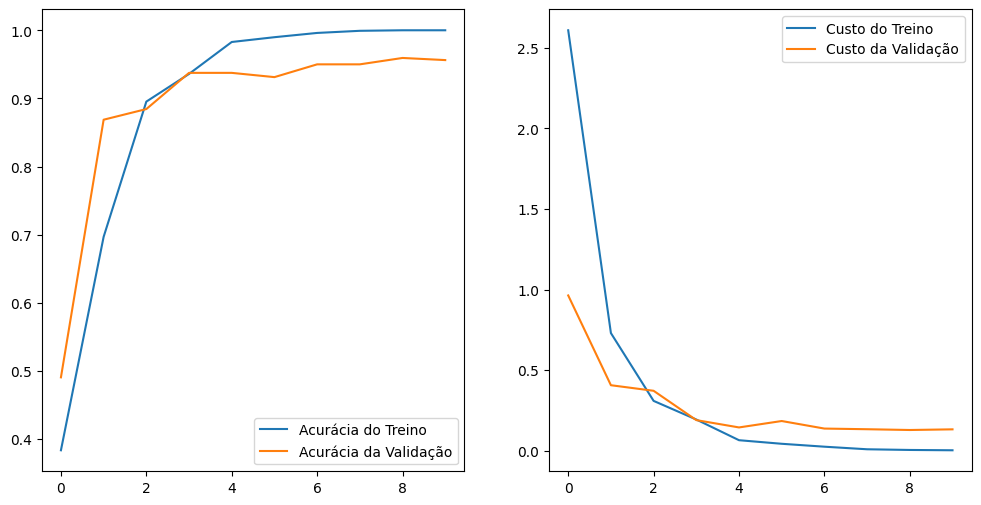

In [28]:
plota_resultados(history,epocas)

In [29]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

## PAREI AQUI AINDA FALTA TESTAR - Utilizando Estratégia de Early Stop para evitar overfitting

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.90):
      print("\n Alcançamos 90% de acurácia. Parando o treinamento!")
      self.model.stop_training = True

callbacks = myCallback()

In [31]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(512, 512, 3)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

## Teste Aumentando a diversidade do dataset

100 épocas sem o aumento dos dados

In [33]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(512, 512, 3)),
    # data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

In [ ]:
plota_resultados(history,epocas)

50 épocas com o aumento dos dados

In [36]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),
  ]
)

In [37]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(512, 512, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

In [ ]:
plota_resultados(history,epocas)

In [40]:
# Salvar o modelo
modelo.save('modelo_apos_aumento.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Usando modelos pré-treinados (ImageNet)

In [41]:
input_shape=(256, 256, 3)

In [42]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape,include_top=False,weights='imagenet' )

87910968/87910968 [==============================] - 1s 0us/step


O modelo [InceptionV3](https://www.tensorflow.org/api_docs/python/tf/keras/applications/InceptionV3) inclui múltiplos filtros de diferentes tamanhos em cada camada, o que permite capturar padrões em várias escalas. Isso pode ser útil para garantir que todas as características relevantes das folhas sejam consideradas. No comando estamos pegando os pesos obtidos com o treinamento do modelo Inception sobre a base de dados [ImageNet](https://www.image-net.org/). Ao escolher o parâmetro include_top=False, não incluímos as camadas de classificação. Isso porque a maioria dos diagramas de modelos de aprendizado de máquina vai de baixo para cima.

In [43]:
modelo_base.trainable = False

In [ ]:
modelo_base.summary()

## Transferindo o aprendizado

In [45]:
rescale = tf.keras.layers.Rescaling((1./255))
treino = treino.map(lambda x, y: (rescale(x), y))
validacao = validacao.map(lambda x, y: (rescale(x), y))

In [46]:
ultima_camada = modelo_base.get_layer('mixed7')
print('tamanho da última camada: ', ultima_camada.output_shape)
ultima_saida = ultima_camada.output

tamanho da última camada:  (None, 14, 14, 768)


In [47]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)

modelo = tf.keras. Model(inputs=modelo_base.input,outputs=x)

In [ ]:
modelo.summary()

In [49]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

## Salvando o modelo

In [51]:
#modelo.save('meu_modelo.h5')

 Opções de salvamento - modelo completo, apenas pesos, apenas arquitetura

In [52]:
modelo.save('modelo_transferencia_de_aprendizado.h5')

In [53]:
modelo.save('modelo_final_transferencia_de_aprendizado.h5', include_optimizer=False)

In [ ]:
modelo.save_weights('pesos.h5')

Comprimir o modelo

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [56]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [57]:
modelo_tflite_quantizado = converter.convert()

In [58]:
# opção mais performatica usando TFLite quantizado
with open('modelo_quantizado16bits.tflite', 'wb') as f:
    f.write(modelo_tflite_quantizado)